In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
from __future__ import print_function

In [3]:
%run nsfg.py


(13593, 244)
nsfg.py: All tests passed.


When working with this kind of data, it is imporatant to be famliar with the **codebook**, which document the design of the study, the survey questions, and the encoding of the responses. The codebook and user's guide for the NSFG data are available from http://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm

In [ ]:
# %load nsfg.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

from collections import defaultdict
import numpy as np
import sys

import thinkstats2


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into preg df
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    df = ReadFemPreg()
    print(df.shape)

    assert len(df) == 13593

    assert df.caseid[13592] == 12571
    assert df.pregordr.value_counts()[1] == 5033
    assert df.nbrnaliv.value_counts()[1] == 8981
    assert df.babysex.value_counts()[1] == 4641
    assert df.birthwgt_lb.value_counts()[7] == 3049
    assert df.birthwgt_oz.value_counts()[0] == 1037
    assert df.prglngth.value_counts()[39] == 4744
    assert df.outcome.value_counts()[1] == 9148
    assert df.birthord.value_counts()[1] == 4413
    assert df.agepreg.value_counts()[22.75] == 100
    assert df.totalwgt_lb.value_counts()[7.5] == 302

    weights = df.finalwgt.value_counts()
    key = max(weights.keys())
    assert df.finalwgt.value_counts()[key] == 6

    print('%s: All tests passed.' % script)

if __name__ == '__main__':
    main(*sys.argv)


In [6]:
import nsfg

In [7]:
df = nsfg.ReadFemPreg()

In [8]:
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [9]:
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [10]:
df.columns[1]

u'pregordr'

In [11]:
pregordr = df['pregordr']

In [12]:
pregordr

0        1
1        2
2        1
3        2
4        3
5        1
6        2
7        3
8        1
9        2
10       1
11       1
12       2
13       3
14       1
15       2
16       3
17       1
18       2
19       1
20       2
21       1
22       2
23       1
24       2
25       3
26       1
27       1
28       2
29       3
        ..
13563    2
13564    3
13565    1
13566    1
13567    1
13568    2
13569    1
13570    2
13571    3
13572    4
13573    1
13574    2
13575    1
13576    1
13577    2
13578    1
13579    2
13580    1
13581    2
13582    3
13583    1
13584    2
13585    1
13586    2
13587    3
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, dtype: int64

In [13]:
pregordr[0]

1

In [14]:
pregordr.head(10)

0    1
1    2
2    1
3    2
4    3
5    1
6    2
7    3
8    1
9    2
Name: pregordr, dtype: int64

In [15]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

In [16]:
pregordr = df.pregordr

## Variables

We have already seen two variables in the NSFG dataset, ```caseid``` and ```pregordr```, and we have seen that there are 244 variables in total.
For the explorations in this book, I use the following variables:

* ```caseid``` is the integer ID of the respondent
* ```prglngth``` is the integer duration of the pregnancy in weeks
* ```outcome``` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth
* ```pregordr``` is a pregnancy serial number; for example, the code for a respondent's first child is 1, and so on.
* ```birthord``` is a serial number for live births; the code for a resopndent's first child is 1, and so on. For outcomes other than live birth, this field is blank.
* ```birthwgt_lb``` and ```birthwgt_oz``` contain the pounds and ounces parts of the birth weight of the baby
* ```agepreg``` is the mother's age at the end of the pregnancy
* ```finalwgt``` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.


In [17]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [18]:
df.birthwgt_lb.value_counts().sort_index()

0        8
1       40
2       53
3       98
4      229
5      697
6     2223
7     3049
8     1889
9      623
10     132
11      26
12      10
13       3
14       3
15       1
Name: birthwgt_lb, dtype: int64

In [19]:
df.birthwgt_lb[df.birthwgt_lb < 6].value_counts().sum()

1125L

In [20]:
df.birthwgt_lb[df.birthwgt_lb == 6].value_counts().sum()

2223L

In [21]:
df.birthwgt_lb[df.birthwgt_lb == 7].value_counts().sum()

3049L

In [22]:
df.birthwgt_lb[df.birthwgt_lb == 8].value_counts().sum()

1889L

In [23]:
df.birthwgt_lb[df.birthwgt_lb >= 9].value_counts().sum()

798L

In [24]:
caseid = 10229

In [25]:
df[['outcome','caseid']][df['caseid'] == 10229]

,outcome,caseid
11093,4,10229
11094,4,10229
11095,4,10229
11096,4,10229
11097,4,10229
11098,4,10229
11099,1,10229


## Exercises

### Exercise 1
In the repository you downloaded, you should find a file named ```chap01ex.ipynb```, which is an IPython notebook. You can launch IPython notebook from the command line like this:

```
> ipython notebook 
```

If IPython is installed, it should launch a server that runs in the background and open a browser to view the notebook. If you are not familiar with IPython, I suggest you start at 
http://ipython.org/ipython-doc/stable/notebook/notebook.html.

To launch the IPython notebook server, run:

```
> ipython notebook &
```

It should open a new browser window, but if not, the startup message provides a URL you can load in a browser, usually http://localhost:8888 . The new window should list the notebooks in the repository.

Open ```chap01.ex.ipynb```. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises you should try. A solution to this exercise is in ```chap01soln.ipynb```.

## Exercise 2

In the repository you downloaded, you should find a file named ```chap01ex.py```; using this file as a starting place, write a function that reads the respondent file, ```2002FemResp.dat.gz```.
The variable ```pregnum``` is a recode that indicates how many times each respondent has been pregnant. Print the value counts for this variable and compare them to the published results in the NSFG codebook. You can also cross-validate the respondent and pregnancy files by comparing ```pregnum``` for each respondent with the number of records in the pregnancy file.

You can use ```nsf.MakePregMap``` to make a dictionary that maps from each ```caseid``` to a list of indices into the pregnancy dataframe. A solution to this exercise is in ```chap01soln.py```

In [ ]:
# %load chap01ex.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import numpy as np
import sys

import nsfg
import thinkstats2


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


In [28]:
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    #CleanFemPreg(df)
    return df


In [29]:
dfresp = ReadFemResp()

In [30]:
dfresp.shape

(7643, 3087)

In [31]:
dfresp.pregnum.describe()

count    7643.000000
mean        1.778490
std         1.847921
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        19.000000
Name: pregnum, dtype: float64

In [32]:
dfresp.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

In [33]:
dfresp.pregnum[dfresp.pregnum >= 7].value_counts().sum()

158L

In [34]:
dfresp.pregnum.sum()

13593L

In [35]:
df.shape

(13593, 244)

In [36]:
dfresp.caseid

0        2298
1        5012
2       11586
3        6794
4         616
5         845
6       10333
7         855
8        8656
9        3566
10       5917
11       9200
12       6320
13      11700
14       7354
15       3697
16       4881
17       5862
18       8542
19       2054
20       3719
21      11740
22      11343
23       7075
24       5422
25       2178
26       8358
27       5083
28       1545
29       5656
        ...  
7613     4640
7614     3998
7615     2432
7616     5438
7617     9643
7618     3030
7619    11585
7620     6677
7621    10744
7622     8403
7623     7574
7624     8000
7625     6288
7626     5856
7627     8794
7628     6365
7629     3537
7630     1515
7631     9174
7632     4213
7633     6804
7634     1282
7635     2954
7636     4964
7637      143
7638    11018
7639     6075
7640     5649
7641      501
7642    10252
Name: caseid, dtype: int64

### <font color="teal">Chapter 2 Distributions</font>

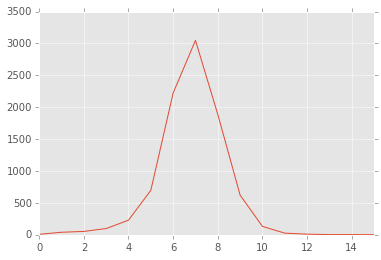

In [37]:
df.birthwgt_lb.value_counts().sort_index().plot()

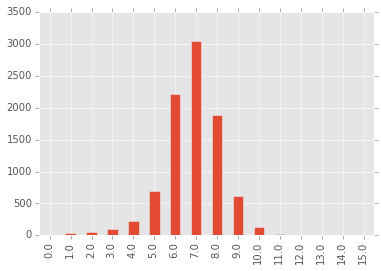

In [38]:
df.birthwgt_lb.value_counts().sort_index().plot(kind='bar')

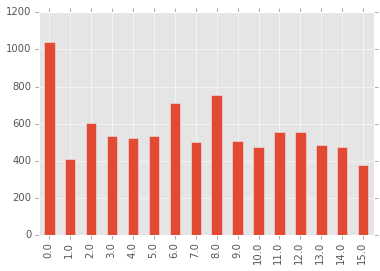

In [39]:
df.birthwgt_oz.value_counts().sort_index().plot(kind='bar')

When you start working with a new dataset, I suggest you explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.

In [40]:
df.agepreg.head()

0    33.16
1    39.25
2    14.33
3    17.83
4    18.33
Name: agepreg, dtype: float64

In [41]:
df.agepreg.round().head()

0    33
1    39
2    14
3    18
4    18
Name: agepreg, dtype: float64

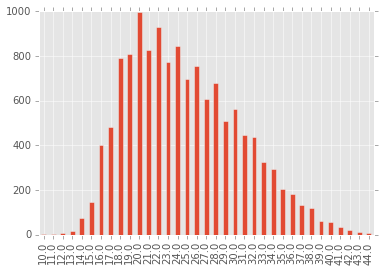

In [42]:
df.agepreg.round().value_counts().sort_index().plot(kind='bar')

In [43]:
import nsfg

In [44]:
preg = nsfg.ReadFemPreg()

In [45]:
live = preg[preg.outcome == 1]

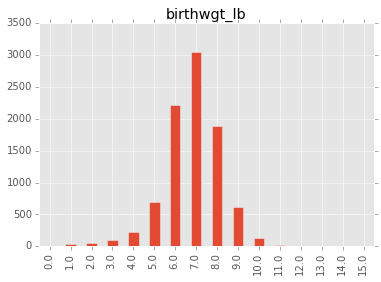

In [46]:
live.birthwgt_lb.value_counts(). \
sort_index().plot(kind='bar', title='birthwgt_lb')

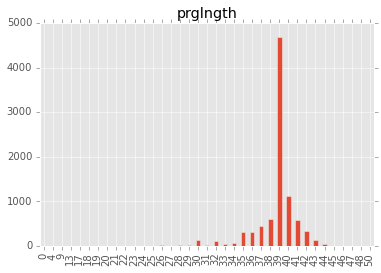

In [47]:
live.prglngth.value_counts(). \
sort_index().plot(kind='bar', title='prglngth')

Before going on, it is a good idea to check for **outliers**, which are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.

In [48]:
live.prglngth.value_counts().sort_index().head(20)

0       1
4       1
9       1
13      1
17      2
18      1
19      1
20      1
21      2
22      7
23      1
24     13
25      3
26     35
27      3
28     32
29     21
30    138
31     27
32    115
Name: prglngth, dtype: int64

In [49]:
live.prglngth.value_counts().sort_index().tail(20)

30     138
31      27
32     115
33      49
34      60
35     311
36     321
37     455
38     607
39    4693
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

The best way to handle outliers depends on "domain knowledge": that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.

In [50]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

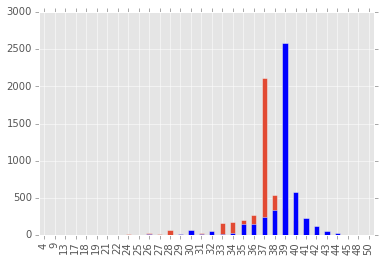

In [51]:
firsts.prglngth.value_counts(). \
sort_index().plot(kind='bar',label='firsts')
others.prglngth.value_counts(). \
sort_index().plot(kind='bar', label='others',color='blue')

In [52]:
firstbabies = firsts.prglngth.value_counts(). \
sort_index()

In [53]:
otherbabies = others.prglngth.value_counts().sort_index()

In [54]:
dfcf = pd.DataFrame({'first_babies': firstbabies,
                    'other_babies': otherbabies})

In [55]:
dfcf.loc[17]

first_babies    1
other_babies    1
Name: 17, dtype: float64

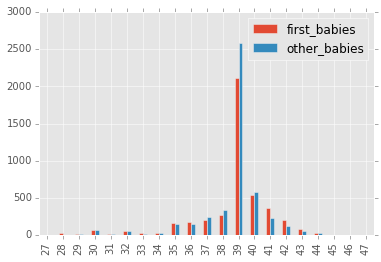

In [56]:
dfcf.loc[27:47].plot(kind='bar')


Histograms are useful because they make the most frequent values immediately apparent. But they are not the best choice for comparing two distributions. In this example, there are fewer "first babies" than "others," so some of the apparent differences in the histograms are due to sample sizes. In the next chapter we address this problem using probability mass functions.

In [57]:
mean = live.prglngth.mean()

In [58]:
print(mean)

38.5605596852


In [59]:
var = live.prglngth.var()
print(var)
std = live.prglngth.std()
print(std)

7.30266206783
2.70234381007


An **effect size** is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

In [60]:
meanothers = others.prglngth.mean()
meanfirsts = firsts.prglngth.mean()
varothers = others.prglngth.var()
varfirsts = firsts.prglngth.var()
stdothers = others.prglngth.std()
stdfirsts = firsts.prglngth.std()

print(meanothers,meanfirsts)

38.5229144667 38.6009517335


Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

In [61]:
def CohenEffectSize(group1, group2):
    import math
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [62]:
huh = CohenEffectSize(firsts.prglngth, others.prglngth)

In [63]:
huh

0.028879044654449883

### Exercise 2
In the repository you downloaded, you should find a file named ```chap02ex.ipynb```; open it. Some cells are already filled in, and you should execute them. Other cells give you instructions for exercises. Follow the instructions and fill in the answers. A solution to this exercise is in ```chap02soln.ipynb```.



### Exercise 3
The mode of a distribution is the most frequent value. Write a function called ```Mode``` that takes a Hist and reutrns the most frequent value.

In [64]:
firsts.prglngth.mode()

0    39
dtype: int64

In [65]:
others.prglngth.mode()

0    39
dtype: int64

In [66]:
firsts.prglngth.value_counts()

39    2114
40     536
41     360
38     272
37     208
42     205
36     172
35     159
43      87
30      73
32      55
34      29
33      28
28      24
44      23
26      16
31      15
29       9
24       7
45       6
22       3
48       3
20       1
47       1
17       1
21       1
25       1
46       1
23       1
27       1
0        1
Name: prglngth, dtype: int64

### Exercise 4
Using the variable ```totalwgt_lb```, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to quantity the difference between the two groups. How does it compare to the difference in pregnancy lengths?

In [67]:
print(firsts.totalwgt_lb.mean())

7.20109443044


In [68]:
print(others.totalwgt_lb.mean())

7.32585561497


In [69]:
check = CohenEffectSize(firsts.totalwgt_lb,
                       others.totalwgt_lb)

In [70]:
check

-0.088672927072602

Its a bigger effect than pregnancy length!

In [ ]:
# %load chap02soln.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2


def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x


def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.

    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)


def main(script):
    """Tests the functions in this module.

    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # explore the weight difference between first babies and others
    WeightDifference(live, firsts, others)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert(mode == 39)

    # test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)

    for value, freq in modes[:5]:
        print(value, freq)

    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


## Chapter 3 Probability mass functions

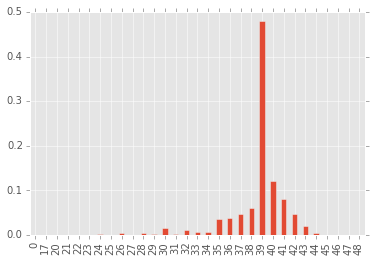

In [73]:
huh = firsts.prglngth.value_counts(normalize=True).\
sort_index().plot(kind='bar')

In [74]:
huh = firsts.prglngth.value_counts(normalize=True).\
sort_index()

duh = others.prglngth.value_counts(normalize=True).\
sort_index()

dfcf = pd.DataFrame({'first': huh,
                     'other': duh})

In [75]:
dfcf.tail(5)

,first,other
45,0.001360,0.000845
46,0.000227,NaN
47,0.000227,NaN
48,0.000680,0.000845
50,NaN,0.000422


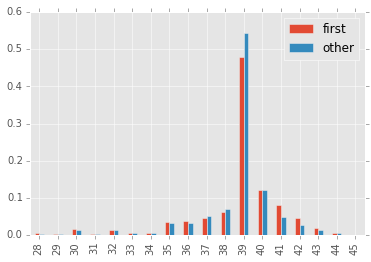

In [76]:
dfcf.loc[28:45].plot(kind='bar')


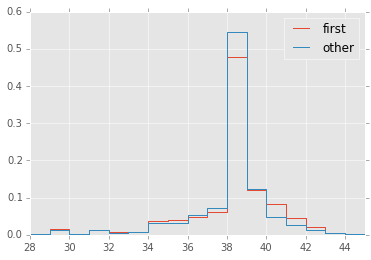

In [77]:
dfcf.loc[28:45].plot(drawstyle='steps')

By plotting the PMF instead of the histogram, we can compare the two distributions without being mislead by the difference in sample size. Based on this figure, first babies seem to be less likely than others to arrive on time (week 39) and more likely to be a late (weeks 41 and 42).

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

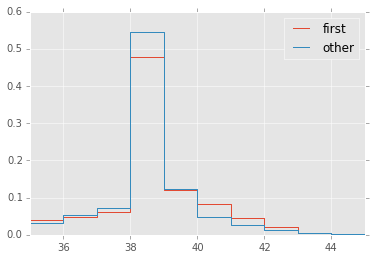

In [78]:
dfcf.loc[35:45].plot(drawstyle='steps')

In [79]:
dfcf.head()

,first,other
0,0.000227,NaN
4,NaN,0.000211
9,NaN,0.000211
13,NaN,0.000211
17,0.000227,0.000211


In [80]:
dfcf['delta'] = dfcf['first'] - dfcf['other']

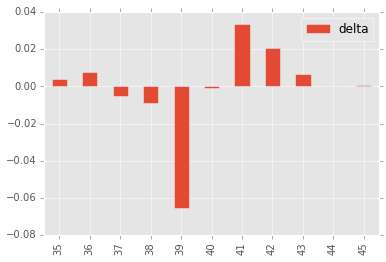

In [81]:
dfcf[['delta']].loc[35:45].plot(kind='bar')

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

For now we should hold this conclusion only tentatively. We used the same dataset to identify an apparent different and then chose a visualization that makes the difference apparent. We can't be sure this effect is real; it might be due to random variation. We'll address this concern later.

### The class size paradox

Before we go on, I want to demonstrate one kind of computation you can do with Pmf objects; I call this example the "class size paradox."

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for this discrepancy:

* Students typically take 4-5 classes per semester, but professors often teach 1 or 2
* The number of students who enjoy a small class is small, but the number of students in a large class is (ahem!) large

The first effect is obvious, at least once it is pointed out; the second is more subtle. Let's look at an example. Suppose that a college offers 65 classes in a given semester, with the following distribution of sizes:

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
```

In [82]:
classcount = [8,8,14,4,6,12,8,3,2]
classsize = [7,12,17,22,27,32,37,42,47]

dfstoopid = pd.DataFrame({'kount': classcount,
                         'size': classsize},
                        index=classsize)

In [83]:
dfstoopid

,kount,size
7,8,7
12,8,12
17,14,17
22,4,22
27,6,27
32,12,32
37,8,37
42,3,42
47,2,47


In [84]:
dfstoopid['huh'] = dfstoopid['kount']*dfstoopid['size']/ \
dfstoopid['kount'].sum()

In [85]:
dfstoopid

,kount,size,huh
7,8,7,0.861538
12,8,12,1.476923
17,14,17,3.661538
22,4,22,1.353846
27,6,27,2.492308
32,12,32,5.907692
37,8,37,4.553846
42,3,42,1.938462
47,2,47,1.446154


In [86]:
dfstoopid['wow'] = dfstoopid['kount']/dfstoopid['kount'].sum()

In [87]:
dfstoopid

,kount,size,huh,wow
7,8,7,0.861538,0.123077
12,8,12,1.476923,0.123077
17,14,17,3.661538,0.215385
22,4,22,1.353846,0.061538
27,6,27,2.492308,0.092308
32,12,32,5.907692,0.184615
37,8,37,4.553846,0.123077
42,3,42,1.938462,0.046154
47,2,47,1.446154,0.030769


In [88]:
bow = (dfstoopid['wow']*dfstoopid['size']).sum()

In [89]:
bow

23.692307692307693

In [90]:
dfstoopid.kount

7      8
12     8
17    14
22     4
27     6
32    12
37     8
42     3
47     2
Name: kount, dtype: int64

In [91]:
  d = { 7: 8, 12: 8, 17: 14, 22: 4, 
          27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }


In [92]:
pmf = thinkstats2.Pmf(d, label='actual')

In [93]:
pmf.Mean()

23.692307692307693

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class was much bigger. Let's see how much bigger.



In [94]:
del dfstoopid['huh']

In [95]:
dfstoopid

,kount,size,wow
7,8,7,0.123077
12,8,12,0.123077
17,14,17,0.215385
22,4,22,0.061538
27,6,27,0.092308
32,12,32,0.184615
37,8,37,0.123077
42,3,42,0.046154
47,2,47,0.030769


In [96]:
dfstoopid['studentpov'] = (dfstoopid['size']*\
dfstoopid['wow'])

In [97]:
dfstoopid['studentpov'] = dfstoopid['studentpov']/\
dfstoopid['studentpov'].sum()

In [98]:
dfstoopid

,kount,size,wow,studentpov
7,8,7,0.123077,0.036364
12,8,12,0.123077,0.062338
17,14,17,0.215385,0.154545
22,4,22,0.061538,0.057143
27,6,27,0.092308,0.105195
32,12,32,0.184615,0.249351
37,8,37,0.123077,0.192208
42,3,42,0.046154,0.081818
47,2,47,0.030769,0.061039


In [99]:
dfstoopid.studentpov.sum()

0.9999999999999999

In [100]:
bowdean = (dfstoopid['wow']*dfstoopid['size']).sum()

In [101]:
bowdean

23.692307692307693

In [102]:
bowstudent = (dfstoopid['studentpov']*dfstoopid['size']).sum()

In [103]:
bowstudent

29.123376623376622

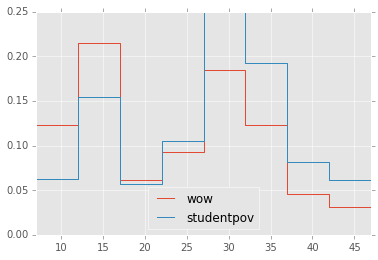

In [104]:
dfstoopid[['wow','studentpov']].plot(drawstyle='steps')

It is also possible to invert this operation. Suppose you want to find the distribution of class sizes at a college, but you can't get reliable data from the Dean. An alternative is to choose a random sample of students and ask how many students are in their classes. The result would be biased for the reasons we've just seen, but you can use it to estimate the actual distribution. 

In [105]:
import numpy as np
import pandas
array = np.random.randn(4,2)

In [106]:
df = pd.DataFrame(array)

In [107]:
df

,0,1
0,0.112742,0.274635
1,-0.079518,-0.521417
2,0.308084,-0.066648
3,0.773293,-1.221065


By default, the rows and columns are numbered starting at zero, but you can provide column names

In [108]:
columns = ['A', 'B']

In [109]:
df = pd.DataFrame(array, columns=columns)

In [110]:
df

,A,B
0,0.112742,0.274635
1,-0.079518,-0.521417
2,0.308084,-0.066648
3,0.773293,-1.221065


You can also provide row names. The set of row names is called the **index**; the row names themselves are called **labels**.

In [111]:
index = ['a', 'b', 'c', 'd']

In [112]:
df = pd.DataFrame(array, columns=columns,
                 index=index)

In [113]:
df

,A,B
a,0.112742,0.274635
b,-0.079518,-0.521417
c,0.308084,-0.066648
d,0.773293,-1.221065


In [114]:
df['A']

a    0.112742
b   -0.079518
c    0.308084
d    0.773293
Name: A, dtype: float64

In [115]:
df.loc['a']

A    0.112742
B    0.274635
Name: a, dtype: float64

In [116]:
df

,A,B
a,0.112742,0.274635
b,-0.079518,-0.521417
c,0.308084,-0.066648
d,0.773293,-1.221065


In [117]:
df.iloc[0]

A    0.112742
B    0.274635
Name: a, dtype: float64

In [118]:
indices = ['a', 'c']

In [119]:
df.loc[indices]

,A,B
a,0.112742,0.274635
c,0.308084,-0.066648


In [120]:
df['a':'c']

,A,B
a,0.112742,0.274635
b,-0.079518,-0.521417
c,0.308084,-0.066648


In [121]:
df[0:2]

,A,B
a,0.112742,0.274635
b,-0.079518,-0.521417


## Exercises  3.6

Solutions to these exercises are in ```chap03soln.ipynb``` and ```chap03soln.py```

### Exercise 1
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample. Use the NSFG respondent variable ```NUMKDHH``` to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distribution, and compute their means.

In [122]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

In [123]:
yo = resp['numkdhh'].value_counts().sort_index()

In [124]:
newresp = pd.DataFrame({'actualhist': yo,
                       'number': yo.index})

In [125]:
newresp

,actualhist,number
0,3563,0
1,1636,1
2,1500,2
3,666,3
4,196,4
5,82,5


In [126]:
newresp['actualpmf'] = newresp['actualhist']/newresp['actualhist'].sum()

In [127]:
newresp

,actualhist,number,actualpmf
0,3563,0,0.466178
1,1636,1,0.214052
2,1500,2,0.196258
3,666,3,0.087139
4,196,4,0.025644
5,82,5,0.010729


In [128]:
newresp['actualwow'] = newresp['number']*newresp['actualpmf']

In [129]:
newresp['actualwow'].sum()

1.024205155043831

So the actual mean is 1.024205155.  

In [130]:
newresp['biased'] = newresp['number']*newresp['actualpmf']

In [131]:
newresp['biasedpmf'] = newresp['biased']/newresp['biased'].sum()

In [132]:
newresp['biasedwow'] = newresp['number']*newresp['biasedpmf']

In [133]:
newresp['biasedwow'].sum()

2.403679100664282

So the biased mean is 2.403!

In [134]:
newresp

,actualhist,number,actualpmf,actualwow,biased,biasedpmf,biasedwow
0,3563,0,0.466178,0.000000,0.000000,0.000000,0.000000
1,1636,1,0.214052,0.214052,0.214052,0.208993,0.208993
2,1500,2,0.196258,0.392516,0.392516,0.383240,0.766479
3,666,3,0.087139,0.261416,0.261416,0.255238,0.765713
4,196,4,0.025644,0.102578,0.102578,0.100153,0.400613
5,82,5,0.010729,0.053644,0.053644,0.052376,0.261880


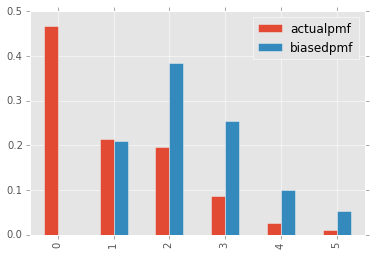

In [135]:
newresp[['actualpmf','biasedpmf']].plot(kind='bar')

### Exercise 3
I started with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a different between first babies and others for the same woman. To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result??

In [136]:
firsts

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125
11,14,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,7.0000
15,15,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.6875
17,18,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,2957.257457,3404.403067,4153.371741,2,14,NaN,6.3125
19,21,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.7500
21,23,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,6210.373020,8120.841310,13533.382043,2,64,NaN,5.5625


In [137]:
others

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250
12,14,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,4.0000
16,15,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.5000
20,21,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.1875
24,24,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3409.573258,4068.628645,7424.840414,1,27,NaN,7.3750


Just merge ```firsts``` and ```others```

In [138]:
firsts[firsts['caseid'] == 10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
11099,10229,7,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,7.6875


In [139]:
others[others['caseid'] == 10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb


In [140]:
firsts['ssn'] = firsts['caseid']
others['ssn'] = others['caseid']

C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [141]:
together = pd.merge(left=firsts,right=others,
                   left_on='caseid', 
                   right_on='caseid')

In [142]:
together.shape

(4735, 489)

In [143]:
firsts.shape

(4413, 245)

In [144]:
together[['caseid','pregordr_x','prglngth_x',
        'pregordr_y','prglngth_y']].head()

,caseid,pregordr_x,prglngth_x,pregordr_y,prglngth_y
0,1,1,39,2,39
1,2,1,39,2,39
2,2,1,39,3,39
3,6,1,38,2,40
4,6,1,38,3,42


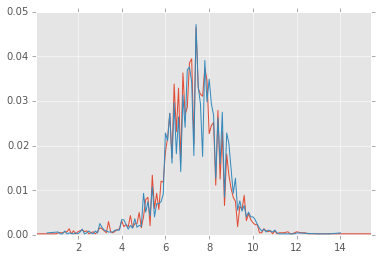

In [145]:
firsts['totalwgt_lb'].round(1).\
value_counts(normalize=True).sort_index().plot()
others['totalwgt_lb'].round(1).\
value_counts(normalize=True).sort_index().plot()

The CDF is the function that maps from a value to its percentile rank.

In [146]:
one = [1,2,2,3,5]

In [147]:
oneseries = pd.Series(one)
onepmf = oneseries.value_counts(normalize=True).sort_index()

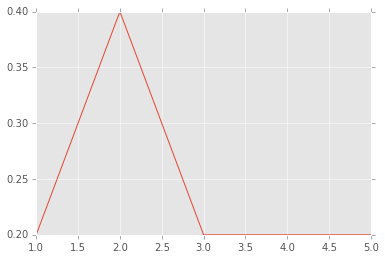

In [148]:
onepmf.plot()

In [149]:
onecdf = onepmf.cumsum()

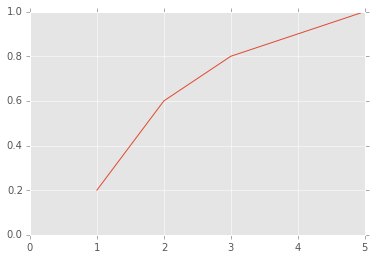

In [150]:
onecdf.plot(ylim=[0,1],xlim=[0,5])
#plt.ylim([0,1])


In [151]:
onecdf

1    0.2
2    0.6
3    0.8
5    1.0
dtype: float64

In [152]:
onecdf.iloc[0] = 0

In [153]:
onecdf

1    0.0
2    0.6
3    0.8
5    1.0
dtype: float64

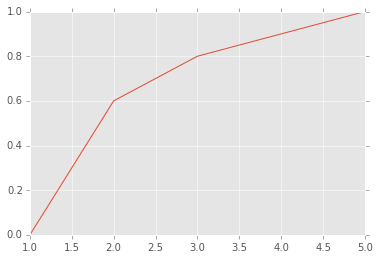

In [154]:
onecdf.plot()

In [155]:
liveprglngth = live.prglngth

In [156]:
liveprglngthpmf = live.prglngth.value_counts(normalize=
                True).sort_index()

In [157]:
liveprglngthcdf = liveprglngthpmf.cumsum()

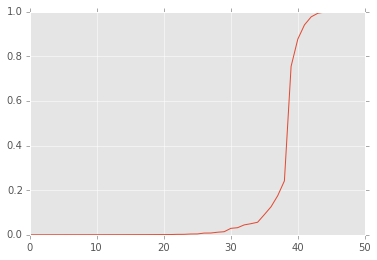

In [158]:
liveprglngthcdf.plot()

In [159]:
a = firsts.totalwgt_lb.value_counts(normalize=
            True).sort_index().cumsum()

b = others.totalwgt_lb.value_counts(normalize=
            True).sort_index().cumsum()

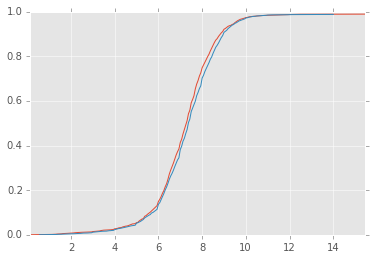

In [160]:
a.plot()
b.plot()

In [161]:
firsts.totalwgt_lb.quantile(.5)

7.3125

In [162]:
firsts.totalwgt_lb.median()

7.3125

In [163]:
others.totalwgt_lb.quantile(.5)

7.375

In [164]:
weights = live.totalwgt_lb
weightscdf = weights.value_counts(normalize=
        True).sort_index().cumsum()

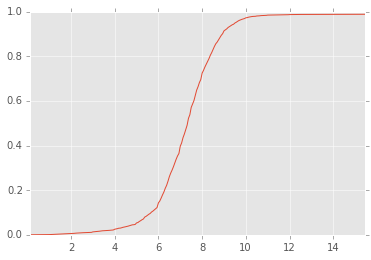

In [165]:
weightscdf.plot()

In [166]:
sample = np.random.choice(weights, 100, replace=True)

In [167]:
sample

array([  7.3125,   6.    ,   8.8125,   7.8125,   7.75  ,   5.1875,
         6.    ,   7.5   ,   6.6875,   7.3125,   9.    ,   7.625 ,
         7.875 ,   7.125 ,   9.5   ,   8.9375,   8.    ,   6.5625,
         8.0625,   5.625 ,   7.125 ,   6.75  ,      nan,   4.5   ,
         7.1875,      nan,   7.    ,   8.375 ,   8.5625,   7.9375,
         7.875 ,   6.3125,   8.5625,   5.1875,   8.625 ,   6.3125,
         8.    ,   7.25  ,   7.1875,   6.    ,      nan,   6.5   ,
         4.875 ,   6.5625,   8.625 ,   5.9375,   7.3125,   9.    ,
         8.25  ,   4.1875,   7.1875,   7.    ,   6.25  ,   8.5   ,
         7.    ,   6.3125,   7.75  ,   7.    ,   6.8125,   7.375 ,
         6.875 ,   7.6875,   5.375 ,   8.625 ,   7.375 ,  10.    ,
         6.25  ,   7.9375,   8.0625,   8.875 ,   7.3125,   7.5   ,
         7.3125,   5.375 ,   6.    ,   7.4375,   6.9375,   7.25  ,
        10.    ,   6.125 ,   5.375 ,   7.    ,   7.    ,   6.4375,
         7.375 ,   7.5   ,   8.5   ,   8.1875,   7.125 ,   6.8

In [168]:
from scipy import stats

In [169]:
stats.percentileofscore(weights, sample[0])

48.13620463489287

In [170]:
stats.percentileofscore(weights, sample[1])

13.254263226934848

In [171]:
yoyo = stats.percentileofscore(weights, sample)

C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\stats\stats.py:1651: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  pct = (np.mean(a_len[idx]) / n) * 100.0


In [172]:
len(sample)

100

In [173]:
yoyolist = list()
for i in range(len(sample)):
    yoyolist.append(stats.percentileofscore(weights, 
                sample[i]))

C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [174]:
yoyolist

[48.13620463489287,
 13.254263226934848,
 87.888062964582431,
 65.577175338871882,
 63.664188893747266,
 6.1543506777437686,
 13.254263226934848,
 55.416484477481418,
 29.744206383909049,
 48.13620463489287,
 90.746611281154358,
 59.340839527765631,
 67.277000437254046,
 42.342588543944032,
 94.627240926978573,
 89.740926978574549,
 70.999125491910803,
 26.836466987319636,
 73.054219501530397,
 9.3954962833406199,
 42.342588543944032,
 31.356580673371226,
 nan,
 3.5362920857017928,
 44.337560122431128,
 nan,
 38.062964582422389,
 79.695015303891552,
 83.739615216440754,
 68.883909051158724,
 67.277000437254046,
 19.987975513773502,
 83.739615216440754,
 6.1543506777437686,
 85.007651945780495,
 19.987975513773502,
 70.999125491910803,
 46.174027109750767,
 44.337560122431128,
 13.254263226934848,
 nan,
 25.005465675557499,
 4.4982509838215998,
 26.836466987319636,
 85.007651945780495,
 11.953432444250108,
 48.13620463489287,
 90.746611281154358,
 77.093353738522083,
 2.8585483165719285

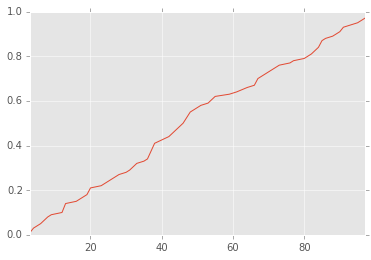

In [175]:
duh = pd.Series(yoyolist).round().value_counts(normalize=
            True).sort_index().cumsum().plot()

## 4.9 Exercises

### Exercise 1
How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution of first babies. Otherwise use the distribution for others. 

In [176]:
firsts.totalwgt_lb.round(2).head()

0     8.81
2     9.12
5     8.56
8     7.56
10    7.81
Name: totalwgt_lb, dtype: float64

In [177]:
stats.percentileofscore(firsts.totalwgt_lb, 7.5)

57.46657602537956

In [178]:
stats.percentileofscore(others.totalwgt_lb, 7.5)

53.51636747624076

### Exercise 2
The numbers generated by ```random.random``` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability. Generate 1000 numbers from 
```random.random``` and plot their PMF and CDF. Is the distribution uniform?

In [179]:
rlist = np.random.random(2000)

In [180]:
rseries = pd.Series(rlist)

In [181]:
rpmf = rseries.round(3).value_counts(normalize=
            True).sort_index()

In [182]:
rcdf = rpmf.cumsum()

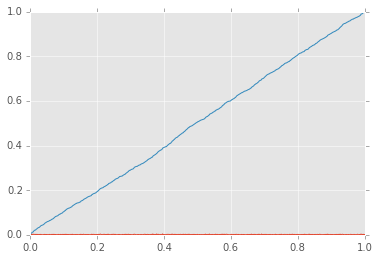

In [183]:
rpmf.plot()
rcdf.plot()

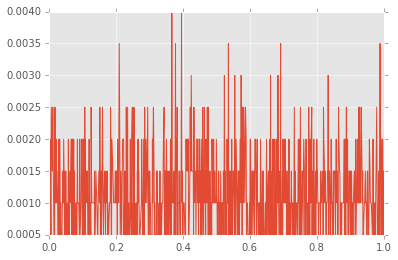

In [184]:
rpmf.plot()

## Chapter 5 Modeling distributions

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called **interarrival times**. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

As an example, we will look at the interarrival time of births. On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia.

In [185]:
import analytic
df = analytic.ReadBabyBoom()

In [186]:
df

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [187]:
diffs = df.minutes.diff()

In [188]:
diffscdf = diffs.value_counts(normalize=
        True).sort_index().cumsum()

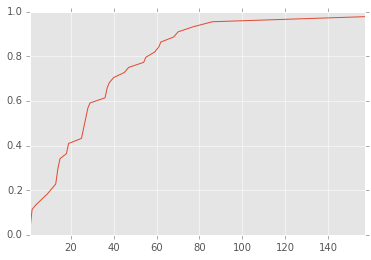

In [189]:
diffscdf.plot()

In [190]:
diffscomp = 1 - diffscdf

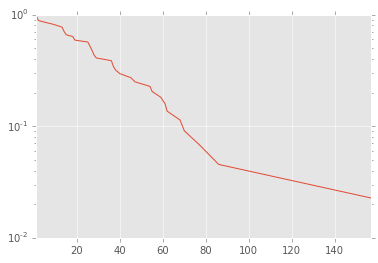

In [191]:
diffscomp.plot(logy=True)

In [192]:
import scipy.stats
scipy.stats.norm.cdf(0)

0.5

In [193]:
scipy.stats.norm.cdf(2, loc=1, scale=0.5)

0.97724986805182079

In [194]:
x = np.linspace(-1,4,1000)

In [195]:
one = scipy.stats.norm.cdf(x, loc=1,scale=0.5)

In [196]:
two = scipy.stats.norm.cdf(x, loc=2, scale=0.4)
three = scipy.stats.norm.cdf(x, loc=3, scale=0.3)

second = pd.Series(two, index=x)
third = pd.Series(three, index=x)

In [197]:
first = pd.Series(one, index=x)

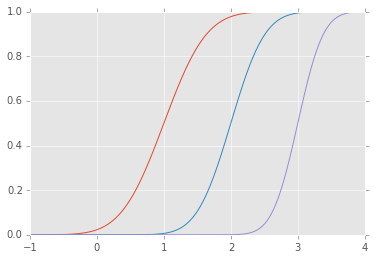

In [198]:
first.plot()
second.plot()
third.plot()

In [199]:
duh = pd.DataFrame({'one': first,
                   'two': second,
                    'three': third})

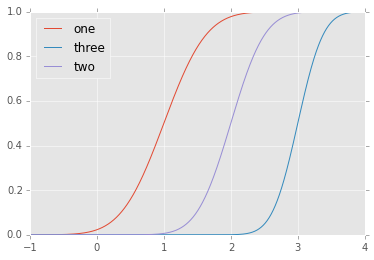

In [200]:
duh.plot()

In [201]:
matplotlib.style.use('ggplot')

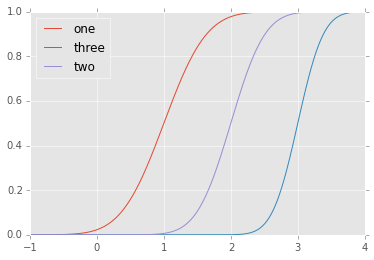

In [202]:
duh.plot()

The sigmoid shape of these curves is a recognizable characteristic of a normal distribution.

In [268]:
a = others.totalwgt_lb

Need to drop nan values!

In [272]:
a = a.dropna()

In [273]:
a.mean()

7.325855614973262

In [274]:
a.var()

1.9437810258964572

In [275]:
aa = a.value_counts(normalize=True).sort_index().cumsum()

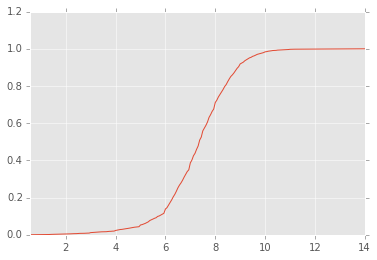

In [276]:
aa.plot()

In [277]:
one = pd.Series(aa)

In [278]:
two = scipy.stats.norm.cdf(one.index, loc=a.mean(), scale=a.std())

In [279]:
second = pd.Series(two, index=one.index)

In [280]:
dfnorm = pd.DataFrame({'realdata': one,
                      'model': second})

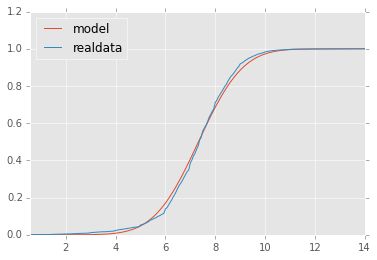

In [281]:
dfnorm.plot()

In [282]:
dfnorm.head()

,model,realdata
0.5625,6.139510e-07,0.000214
0.6250,7.689279e-07,0.000428
1.0625,3.520397e-06,0.000856
1.1250,4.341291e-06,0.001070
1.2500,6.563857e-06,0.001283


In [283]:
one.index

Float64Index([ 0.5625,   0.625,  1.0625,   1.125,    1.25,  1.3125,   1.375,
               1.4375,     1.5,  1.5625,
              ...
               11.125, 11.1875, 11.4375,    11.5,   11.75, 11.9375,    12.0,
                 13.0,    13.5,    14.0],
             dtype='float64', length=163)

In [284]:
two

array([  6.13950960e-07,   7.68927930e-07,   3.52039714e-06,
         4.34129079e-06,   6.56385721e-06,   8.04772801e-06,
         9.84806546e-06,   1.20279783e-05,   1.46621963e-05,
         1.78390095e-05,   3.17602756e-05,   4.62095845e-05,
         6.67202304e-05,   7.99422317e-05,   1.14111553e-04,
         1.35945817e-04,   1.61650196e-04,   1.91849925e-04,
         2.27259960e-04,   2.68695886e-04,   3.17085831e-04,
         4.39081854e-04,   5.15229003e-04,   6.03443762e-04,
         7.05433444e-04,   8.23112345e-04,   9.58621412e-04,
         1.11434897e-03,   1.29295249e-03,   1.73089963e-03,
         1.99711174e-03,   2.29998565e-03,   2.64387860e-03,
         3.47424715e-03,   3.97160827e-03,   4.53180784e-03,
         5.16151858e-03,   5.86794481e-03,   6.65884176e-03,
         7.54253265e-03,   8.52792283e-03,   9.62451078e-03,
         1.08423952e-02,   1.21922781e-02,   1.36854626e-02,
         1.53338460e-02,   1.71499068e-02,   1.91466853e-02,
         2.13377582e-02,

In [285]:
a.mean()

7.325855614973262

In [286]:
a.std()

1.3941954762143138

### Normal probability plot

For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution there is no such transformation, but there is an alternative called a **normal probability plot**. There are ways to generate a normal probability plot: the hard way and the easy way. Here's the easy way:

1. Sort the values of the sample
2. From a standard normal distribution ($\mu = 0$ and $\sigma = 1$), generate a random sample with the same size as teh sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

If the distribution of the sample is approximately normal, the result is a straight line with intercept ```mu``` and 
slope ```sigma```.

In [287]:
aaa = a.sort_values(inplace=False)

In [288]:
aaa

4963      0.5625
5411      0.6250
4104      1.0625
8870      1.0625
6438      1.1250
3841      1.2500
5307      1.3125
6441      1.3750
541       1.3750
9743      1.3750
7762      1.4375
4798      1.5000
248       1.5625
5769      1.5625
5216      1.7500
6440      1.8750
10652     1.8750
6714      2.0000
1529      2.0625
6696      2.0625
9498      2.0625
7077      2.1875
812       2.1875
8998      2.1875
1482      2.2500
4656      2.2500
7234      2.2500
3240      2.3125
1720      2.3750
5231      2.4375
          ...   
8185     10.6875
1243     10.6875
2377     10.6875
4756     10.6875
3594     10.6875
6852     10.7500
2246     10.7500
3668     10.8125
5252     10.8125
4757     10.8750
8009     10.8750
7854     10.9375
12099    11.0000
9661     11.0000
2556     11.0000
11103    11.0000
256      11.0000
5117     11.1250
7485     11.1250
3595     11.1875
9599     11.4375
7299     11.5000
1061     11.7500
4412     11.9375
9735     12.0000
105      12.0000
6733     13.0000
903      13.50

In [289]:
aaa.mean()

7.325855614973262

In [290]:
aaa.std()

1.3941954762143052

In [291]:
aaa.shape

(4675L,)

In [292]:
newvalues = np.random.normal(loc=aaa.mean(), scale=aaa.std(), size=aaa.shape[0])

In [293]:
newvalues

array([  5.19408439,  12.07411485,   7.64394205, ...,   5.40461329,
         6.20938827,   7.63736829])

In [294]:
news = pd.Series(newvalues)

In [303]:
news.sort_values(inplace=True)
news.index = aaa.index

In [304]:
news

4963      1.950740
5411      2.736821
4104      2.748993
8870      2.874118
6438      3.100467
3841      3.194045
5307      3.221477
6441      3.231622
541       3.246537
9743      3.285402
7762      3.299147
4798      3.313557
248       3.314444
5769      3.385150
5216      3.403398
6440      3.429619
10652     3.513715
6714      3.524577
1529      3.540479
6696      3.562848
9498      3.618064
7077      3.638751
812       3.643802
8998      3.658994
1482      3.683713
4656      3.739757
7234      3.758165
3240      3.761966
1720      3.791297
5231      3.802649
           ...    
8185     10.683794
1243     10.691312
2377     10.710027
4756     10.717551
3594     10.771709
6852     10.787789
2246     10.813899
3668     10.817942
5252     10.890093
4757     10.928766
8009     10.962401
7854     10.967673
12099    11.004052
9661     11.029885
2556     11.049100
11103    11.062357
256      11.335690
5117     11.356277
7485     11.366005
3595     11.402942
9599     11.416907
7299     11.

In [305]:
dfduh = pd.DataFrame({'realdata': aaa,
                     'sampledata': news})

In [306]:
dfduh

,realdata,sampledata
4963,0.5625,1.950740
5411,0.6250,2.736821
4104,1.0625,2.748993
8870,1.0625,2.874118
6438,1.1250,3.100467
3841,1.2500,3.194045
5307,1.3125,3.221477
6441,1.3750,3.231622
541,1.3750,3.246537
9743,1.3750,3.285402


C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


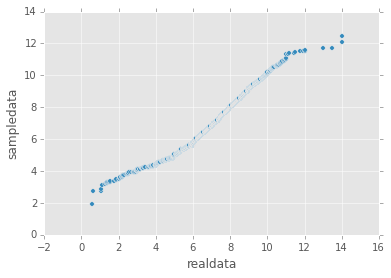

In [308]:
dfduh.plot(kind='scatter', x='realdata',y='sampledata')

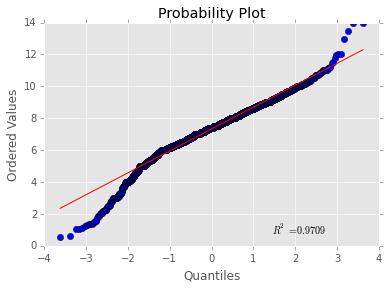

In [311]:
ax =plt.subplot(111)
res = scipy.stats.probplot(aaa.values,plot=plt)

In [ ]:
# %load brfss.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import math
import sys
import pandas
import numpy as np

import thinkstats2
import thinkplot


def Summarize(df, column, title):
    """Print summary statistics male, female and all."""

    items = [
        ('all', df[column]),
        ('male', df[df.sex == 1][column]),
        ('female', df[df.sex == 2][column]),
        ]

    print(title)
    print('key\tn\tmean\tvar\tstd\tcv')
    for key, series in items:
        mean, var = series.mean(), series.var()
        std = math.sqrt(var)
        cv = std / mean
        t = key, len(series), mean, var, std, cv
        print('%s\t%d\t%4.2f\t%4.2f\t%4.2f\t%4.4f' % t)


def CleanBrfssFrame(df):
    """Recodes BRFSS variables.

    df: DataFrame
    """
    # clean age
    df.age.replace([7, 9], float('NaN'), inplace=True)

    # clean height
    df.htm3.replace([999], float('NaN'), inplace=True)

    # clean weight
    df.wtkg2.replace([99999], float('NaN'), inplace=True)
    df.wtkg2 /= 100.0

    # clean weight a year ago
    df.wtyrago.replace([7777, 9999], float('NaN'), inplace=True)
    df['wtyrago'] = df.wtyrago.apply(lambda x: x/2.2 if x < 9000 else x-9000)


def ReadBrfss(filename='CDBRFS08.ASC.gz', compression='gzip', nrows=None):
    """Reads the BRFSS data.

    filename: string
    compression: string
    nrows: int number of rows to read, or None for all

    returns: DataFrame
    """
    var_info = [
        ('age', 101, 102, int),
        ('sex', 143, 143, int),
        ('wtyrago', 127, 130, int),
        ('finalwt', 799, 808, int),
        ('wtkg2', 1254, 1258, int),
        ('htm3', 1251, 1253, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pandas.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, compression=compression, nrows=nrows)
    CleanBrfssFrame(df)
    return df


def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = math.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)


def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = math.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')


def MakeFigures(df):
    """Generates CDFs and normal prob plots for weights and log weights."""
    weights = df.wtkg2.dropna()
    log_weights = np.log10(weights)

    # plot weights on linear and log scales
    thinkplot.PrePlot(cols=2)
    MakeNormalModel(weights)
    thinkplot.Config(xlabel='adult weight (kg)', ylabel='CDF')

    thinkplot.SubPlot(2)
    MakeNormalModel(log_weights)
    thinkplot.Config(xlabel='adult weight (log10 kg)')

    thinkplot.Save(root='brfss_weight')

    # make normal probability plots on linear and log scales
    thinkplot.PrePlot(cols=2)
    MakeNormalPlot(weights)
    thinkplot.Config(xlabel='z', ylabel='weights (kg)')

    thinkplot.SubPlot(2)
    MakeNormalPlot(log_weights)
    thinkplot.Config(xlabel='z', ylabel='weights (log10 kg)')

    thinkplot.Save(root='brfss_weight_normal')


def main(script, nrows=1000):
    """Tests the functions in this module.

    script: string script name
    """
    thinkstats2.RandomSeed(17)

    nrows = int(nrows)    
    df = ReadBrfss(nrows=nrows)
    MakeFigures(df)

    Summarize(df, 'htm3', 'Height (cm):')
    Summarize(df, 'wtkg2', 'Weight (kg):')
    Summarize(df, 'wtyrago', 'Weight year ago (kg):')

    if nrows == 1000:
        assert(df.age.value_counts()[40] == 28)
        assert(df.sex.value_counts()[2] == 668)
        assert(df.wtkg2.value_counts()[90.91] == 49)
        assert(df.wtyrago.value_counts()[160/2.2] == 49)
        assert(df.htm3.value_counts()[163] == 103)
        assert(df.finalwt.value_counts()[185.870345] == 13)
        print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


In [313]:
%run brfss.py

n, mean, std 954 80.5273931624 19.4196558731
n, mean, std 954 1.89373164202 0.102604423971
Writing brfss_weight.pdf
Writing brfss_weight.eps
Writing brfss_weight_normal.pdf
Writing brfss_weight_normal.eps
Height (cm):
key	n	mean	var	std	cv
all	1000	169.06	103.21	10.16	0.0601
male	332	179.34	53.20	7.29	0.0407
female	668	163.95	49.41	7.03	0.0429
Weight (kg):
key	n	mean	var	std	cv
all	1000	80.89	441.98	21.02	0.2599
male	332	91.97	378.42	19.45	0.2115
female	668	75.22	379.98	19.49	0.2592
Weight year ago (kg):
key	n	mean	var	std	cv
all	1000	81.46	499.01	22.34	0.2742
male	332	93.02	430.84	20.76	0.2231
female	668	75.54	430.94	20.76	0.2748
brfss.py: All tests passed.


In [314]:
df

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [315]:
df.weight_g

0     3837
1     3334
2     3554
3     3838
4     3625
5     2208
6     1745
7     2846
8     3166
9     3520
10    3380
11    3294
12    2576
13    3208
14    3521
15    3746
16    3523
17    2902
18    2635
19    3920
20    3690
21    3430
22    3480
23    3116
24    3428
25    3783
26    3345
27    3034
28    2184
29    3300
30    2383
31    3428
32    4162
33    3630
34    3406
35    3402
36    3500
37    3736
38    3370
39    2121
40    3150
41    3866
42    3542
43    3278
Name: weight_g, dtype: int64

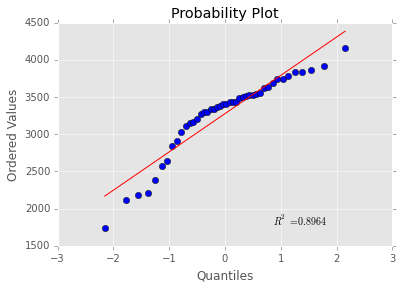

In [316]:
ax =plt.subplot(111)
res = scipy.stats.probplot(df.weight_g.values,plot=plt)

In [ ]:
# %load populations.py
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import csv
import logging
import sys
import numpy as np
import pandas

import thinkplot
import thinkstats2


def ReadData(filename='PEP_2012_PEPANNRES_with_ann.csv'):
    """Reads filename and returns populations in thousands

    filename: string

    returns: pandas Series of populations in thousands
    """
    df = pandas.read_csv(filename, header=None, skiprows=2,
                         encoding='iso-8859-1')
    populations = df[7]
    populations.replace(0, np.nan, inplace=True)
    return populations.dropna()


def MakeFigures():
    """Plots the CDF of populations in several forms.

    On a log-log scale the tail of the CCDF looks like a straight line,
    which suggests a Pareto distribution, but that turns out to be misleading.

    On a log-x scale the distribution has the characteristic sigmoid of
    a lognormal distribution.

    The normal probability plot of log(sizes) confirms that the data fit the
    lognormal model very well.

    Many phenomena that have been described with Pareto models can be described
    as well, or better, with lognormal models.
    """
    pops = ReadData()
    print('Number of cities/towns', len(pops))
    
    log_pops = np.log10(pops)
    cdf = thinkstats2.Cdf(pops, label='data')
    cdf_log = thinkstats2.Cdf(log_pops, label='data')

    # pareto plot
    xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
    thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

    thinkplot.Cdf(cdf_log, complement=True) 
    thinkplot.Config(xlabel='log10 population',
                     ylabel='CCDF',
                     yscale='log')
    thinkplot.Save(root='populations_pareto')

    # lognormal plot
    thinkplot.PrePlot(cols=2)

    mu, sigma = log_pops.mean(), log_pops.std()
    xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
    thinkplot.Plot(xs, ps, label='model', color='0.8')

    thinkplot.Cdf(cdf_log) 
    thinkplot.Config(xlabel='log10 population',
                     ylabel='CDF')

    thinkplot.SubPlot(2)
    thinkstats2.NormalProbabilityPlot(log_pops, label='data')
    thinkplot.Config(xlabel='z',
                     ylabel='log10 population',
                     xlim=[-5, 5])

    thinkplot.Save(root='populations_normal')
    

def main():
    thinkstats2.RandomSeed(17)
    MakeFigures()


if __name__ == "__main__":
    main()


In [318]:
def ReadData(filename='PEP_2012_PEPANNRES_with_ann.csv'):
    """Reads filename and returns populations in thousands

    filename: string

    returns: pandas Series of populations in thousands
    """
    df = pandas.read_csv(filename, header=None, skiprows=2,
                         encoding='iso-8859-1')
    populations = df[7]
    populations.replace(0, np.nan, inplace=True)
    return populations.dropna()

In [319]:
pops = ReadData()

In [320]:
pops

0         2654
1         4490
2          746
3          344
4        30991
5        21516
6        14728
7         2432
8          628
9          932
10        9064
11         281
12       22749
13        8237
14        1278
15        4131
16         761
17         354
18        2169
19        1952
20        2234
21       23469
22       10121
23        6010
24       56908
25         884
26         544
27         607
28         610
29         273
         ...  
19486      240
19487     1147
19488     2043
19489      492
19490     6308
19491      898
19492     9113
19493       51
19494    10971
19495      244
19496    24047
19497      441
19498     1663
19499    17698
19500      664
19501      423
19502     1491
19503     1213
19504      340
19505      257
19506      357
19507     3019
19508     6757
19509     1083
19510       15
19511      464
19512     3641
19513     5454
19514     1856
19515      155
Name: 7, dtype: float64

In [321]:
popscdf = pops.value_counts(normalize=True).sort_index().cumsum()

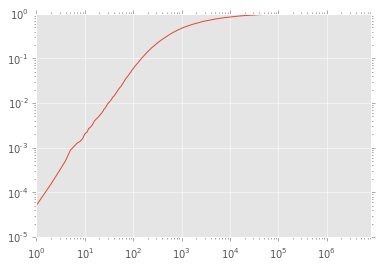

In [324]:
popscdf.plot(logx=True,logy=True)

In [325]:
popsccdf = 1 - popscdf

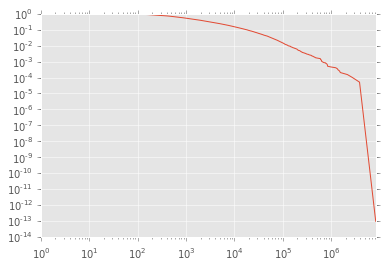

In [326]:
popsccdf.plot(logx=True,logy=True)

## 5.8 Exercises

For the following exercises, you can start with ```chap05ex.ipynb``` . My solution is in ```chap05soln.ipynb```

### Exercise 1
In the BRFSS, the distribution of heights is roughly normal with parameters $\mu = 178$ cm and $\sigma=7.7$ cm 
for men, and $\mu = 163$ cm and $\sigma = 7.3$ cm for women. In order to join the Blue Man Group, you have to be male between
5'10'' and 6'1''.
What percenterage of the U.S. male population is in this range?
Hint: use ```scipy.stats.norm.cdf```

In [328]:
mu = 178
sigma = 7.7

bottom = (5*12 + 10)*2.54
top = (6*12 + 1)*2.54

In [329]:
huh = scipy.stats.norm.cdf(top,loc=mu,scale=sigma) - scipy.stats.norm.cdf(bottom,loc=mu,scale=sigma)

In [330]:
huh

0.34274683763147457

### Exercise 2
To get a feel for the Pareto distribution, let's see how different the world wold be if the distribution of human height were Pareto. With the parameters $x_m = 1$ m and $\alpha = 1.7$, we get a distribution with a reasonable minumumum, 1 m, and median, 1.5 m.
Plot this distribution.

In [346]:
alpha = 1.6
xmin = 1
from scipy.stats import pareto
x = np.linspace(pareto.ppf(0.01, b=alpha), pareto.ppf(0.99,b=alpha), 1000)

In [347]:
yo = pareto.pdf(x, b=alpha,scale=xmin)

In [348]:
duh = pd.Series(yo, index=x)

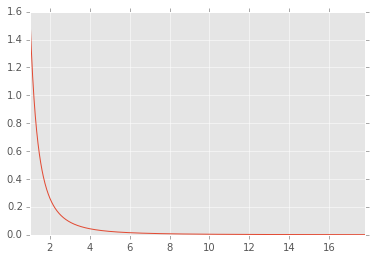

In [349]:
duh.plot()

In [350]:
duh.mean()

0.05914983603896447

In [351]:
duh.median()

0.0047276392899263196

In [352]:
alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

In [353]:
dist.mean()

2.4285714285714288

In [ ]:
# %load density.py
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import math
import random

import brfss
import first
import thinkstats2
import thinkplot


def Summarize(data):
    """Prints summary statistics.

    data: pandas Series
    """
    mean = data.mean()
    std = data.std()
    median = thinkstats2.Median(data)
    print('mean', mean)
    print('std', std)
    print('median', median)
    print('skewness', thinkstats2.Skewness(data))
    print('pearson skewness', 
          thinkstats2.PearsonMedianSkewness(data))

    return mean, median


def ComputeSkewnesses():
    """Plots KDE of birthweight and adult weight.
    """
    def VertLine(x, y):
        thinkplot.Plot([x, x], [0, y], color='0.6', linewidth=1)

    live, firsts, others = first.MakeFrames()
    data = live.totalwgt_lb.dropna()
    print('Birth weight')
    mean, median = Summarize(data)

    y = 0.35
    VertLine(mean, y)
    thinkplot.Text(mean-0.15, 0.1*y, 'mean', horizontalalignment='right')
    VertLine(median, y)
    thinkplot.Text(median+0.1, 0.1*y, 'median', horizontalalignment='left')

    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf, label='birth weight')
    thinkplot.Save(root='density_totalwgt_kde',
                   xlabel='lbs',
                   ylabel='PDF')

    df = brfss.ReadBrfss(nrows=None)
    data = df.wtkg2.dropna()
    print('Adult weight')
    mean, median = Summarize(data)

    y = 0.02499
    VertLine(mean, y)
    thinkplot.Text(mean+1, 0.1*y, 'mean', horizontalalignment='left')
    VertLine(median, y)
    thinkplot.Text(median-1.5, 0.1*y, 'median', horizontalalignment='right')

    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf, label='adult weight')
    thinkplot.Save(root='density_wtkg2_kde',
                   xlabel='kg',
                   ylabel='PDF',
                   xlim=[0, 200])


def MakePdfExample(n=500):
    """Plots a normal density function and a KDE estimate.

    n: sample size
    """
    # mean and var of women's heights in cm, from the BRFSS
    mean, var = 163, 52.8
    std = math.sqrt(var)

    # make a PDF and compute a density, FWIW
    pdf = thinkstats2.NormalPdf(mean, std)
    print(pdf.Density(mean + std))

    # make a PMF and plot it
    thinkplot.PrePlot(2)
    thinkplot.Pdf(pdf, label='normal')

    # make a sample, make an estimated PDF, and plot it
    sample = [random.gauss(mean, std) for _ in range(n)]
    sample_pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(sample_pdf, label='sample KDE')

    thinkplot.Save(root='pdf_example',
                   xlabel='Height (cm)',
                   ylabel='Density')


def main():
    thinkstats2.RandomSeed(17)

    MakePdfExample()
    ComputeSkewnesses()


if __name__ == '__main__':
    main()


In [355]:
mean, var = 163, 52.8
std = math.sqrt(var)

In [360]:
import random
sample = [random.gauss(mean, std) for i in range(500)]

In [362]:
sample[:5]

[149.95164533025618,
 161.186093183493,
 168.82509118673164,
 161.52365806015067,
 164.14589560520432]

In [363]:
duh = pd.Series(sample)

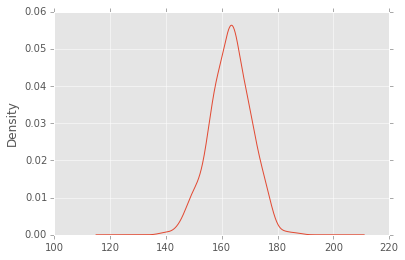

In [364]:
duh.plot(kind='kde')

### 6.7 Moments
Any time you take a sample and reduce it to a single number, that number is a statistic. The statistics we hve seen so far include mean, variance, median, and interquartile range.

A **raw moment** is a kind of statistic. If you have a sample of values $x_{i}$, the $k^{th}$ raw moment is:

$
m_{k}^{\prime} = \frac{1}{n} \sum_{i} x_{i}^{k}
$

In [365]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

The **central moments** are more useful. The $k^{th}$ central moment is:

$
m_{k} = \frac{1}{n} \sum_{i} (x_{i} - \bar{x})^{k}
$

In [366]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

### 6.8 Skewness

**Skewness** is a property that describes the shape of a distribution. If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is "right skewed" and if the values extend left, it si "left skewed".

In [ ]:
# %load scatter.py
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import sys
import numpy as np
import math

import brfss
import thinkplot
import thinkstats2


def GetHeightWeight(df, hjitter=0.0, wjitter=0.0):
    """Get sequences of height and weight.

    df: DataFrame with htm3 and wtkg2
    hjitter: float magnitude of random noise added to heights
    wjitter: float magnitude of random noise added to weights

    returns: tuple of sequences (heights, weights)
    """
    heights = df.htm3
    if hjitter:
        heights = thinkstats2.Jitter(heights, hjitter)

    weights = df.wtkg2
    if wjitter:
        weights = thinkstats2.Jitter(weights, wjitter)

    return heights, weights


def ScatterPlot(heights, weights, alpha=1.0):
    """Make a scatter plot and save it.

    heights: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(heights, weights, alpha=alpha)
    thinkplot.Config(xlabel='height (cm)',
                     ylabel='weight (kg)',
                     axis=[140, 210, 20, 200],
                     legend=False)


def HexBin(heights, weights, bins=None):
    """Make a hexbin plot and save it.

    heights: sequence of float
    weights: sequence of float
    bins: 'log' or None for linear
    """
    thinkplot.HexBin(heights, weights, bins=bins)
    thinkplot.Config(xlabel='height (cm)',
                     ylabel='weight (kg)',
                     axis=[140, 210, 20, 200],
                     legend=False)


def MakeFigures(df):
    """Make scatterplots.
    """
    sample = thinkstats2.SampleRows(df, 5000)

    # simple scatter plot
    thinkplot.PrePlot(cols=2)
    heights, weights = GetHeightWeight(sample)
    ScatterPlot(heights, weights)

    # scatter plot with jitter
    thinkplot.SubPlot(2)
    heights, weights = GetHeightWeight(sample, hjitter=1.3, wjitter=0.5)
    ScatterPlot(heights, weights)

    thinkplot.Save(root='scatter1')

    # with jitter and transparency
    thinkplot.PrePlot(cols=2)
    ScatterPlot(heights, weights, alpha=0.1)

    # hexbin plot
    thinkplot.SubPlot(2)
    heights, weights = GetHeightWeight(df, hjitter=1.3, wjitter=0.5)
    HexBin(heights, weights)
    thinkplot.Save(root='scatter2')


def BinnedPercentiles(df):
    """Bin the data by height and plot percentiles of weight for eachbin.

    df: DataFrame
    """
    cdf = thinkstats2.Cdf(df.htm3)
    print('Fraction between 140 and 200 cm', cdf[200] - cdf[140])

    bins = np.arange(135, 210, 5)
    indices = np.digitize(df.htm3, bins)
    groups = df.groupby(indices)

    heights = [group.htm3.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(heights, weights, label=label)

    thinkplot.Save(root='scatter3',
                   xlabel='height (cm)',
                   ylabel='weight (kg)')


def Correlations(df):
    print('pandas cov', df.htm3.cov(df.wtkg2))
    #print('NumPy cov', np.cov(df.htm3, df.wtkg2, ddof=0))
    print('thinkstats2 Cov', thinkstats2.Cov(df.htm3, df.wtkg2))
    print()

    print('pandas corr', df.htm3.corr(df.wtkg2))
    #print('NumPy corrcoef', np.corrcoef(df.htm3, df.wtkg2, ddof=0))
    print('thinkstats2 Corr', thinkstats2.Corr(df.htm3, df.wtkg2))
    print()

    print('pandas corr spearman', df.htm3.corr(df.wtkg2, method='spearman'))
    print('thinkstats2 SpearmanCorr', 
          thinkstats2.SpearmanCorr(df.htm3, df.wtkg2))
    print('thinkstats2 SpearmanCorr log wtkg3', 
          thinkstats2.SpearmanCorr(df.htm3, np.log(df.wtkg2)))
    print()

    print('thinkstats2 Corr log wtkg3',
          thinkstats2.Corr(df.htm3, np.log(df.wtkg2)))
    print()


def main(script):
    thinkstats2.RandomSeed(17)
    
    df = brfss.ReadBrfss(nrows=None)
    df = df.dropna(subset=['htm3', 'wtkg2'])
    Correlations(df)
    return

    MakeFigures(df)
    BinnedPercentiles(df)
    

if __name__ == '__main__':
    main(*sys.argv)


In [368]:
import brfss

In [369]:
df = brfss.ReadBrfss(nrows=None)

In [370]:
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
2,48,2,NaN,181.063210,NaN,165
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185
5,42,1,118.181818,415.161314,109.09,183
6,40,2,50.000000,422.810541,50.00,157
7,24,2,131.818182,1280.585980,122.73,178
8,37,1,87.727273,1245.060440,90.00,178
9,65,1,77.272727,382.738158,77.27,173


In [371]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
2,48,2,NaN,181.063210,NaN,165
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185


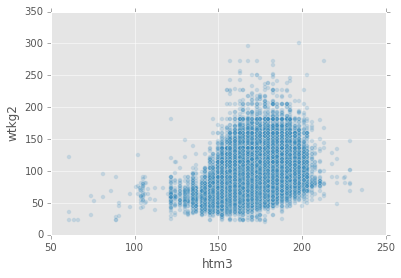

In [374]:
df.plot(kind='scatter',x='htm3',y='wtkg2',alpha=.2)

To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it.

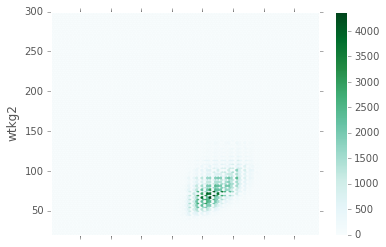

In [376]:
df.plot.hexbin(x='htm3',y='wtkg2')

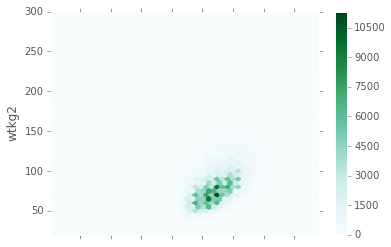

In [377]:
df.plot.hexbin(x='htm3',y='wtkg2',gridsize=50)

In [378]:
dfc = df.corr()

In [379]:
dfc

,age,sex,wtyrago,finalwt,wtkg2,htm3
age,1.000000,0.034747,-0.053242,-0.271993,-0.084336,-0.128017
sex,0.034747,1.000000,-0.393409,-0.119351,-0.406825,-0.694976
wtyrago,-0.053242,-0.393409,1.000000,0.015771,0.936003,0.489592
finalwt,-0.271993,-0.119351,0.015771,1.000000,0.025305,0.077936
wtkg2,-0.084336,-0.406825,0.936003,0.025305,1.000000,0.508736
htm3,-0.128017,-0.694976,0.489592,0.077936,0.508736,1.000000


### 7.6 Nonlinear relationshps

If Pearson's correlation is near 0, it is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid. Pearson's correlation only measure _linear_ relationshps. If there's a nonlinear relationship, $\rho$ understates its strength.

In [380]:
dfs = df.corr(method='spearman')

In [381]:
dfs

,age,sex,wtyrago,finalwt,wtkg2,htm3
age,1.000000,0.031359,-0.037066,-0.297411,-0.071502,-0.123188
sex,0.031359,1.000000,-0.444804,-0.142010,-0.451686,-0.709872
wtyrago,-0.037066,-0.444804,1.000000,0.038659,0.947633,0.527614
finalwt,-0.297411,-0.142010,0.038659,1.000000,0.050266,0.115305
wtkg2,-0.071502,-0.451686,0.947633,0.050266,1.000000,0.540585
htm3,-0.123188,-0.709872,0.527614,0.115305,0.540585,1.000000


### 7.8 Correlation and causation

If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B. These explanationa are called "causal relationships."

Correlation alone does not distinguish between these explanations, so it does not tell you which ones are true. This rule is often summarized with the phrase "Correlation does not imply causation."

Wo what can you do to provide evidence of causation?

1. Use time. If A comes before B, then A can cause B but not the other way around (at least according to our common understanding of causation). The order of events can help us to infer the direction of cauasation, but it does not preclude the possibility that something else causes both A and B.
2. Use randomness. IF you divide a large sample into two groups at random and compute the means of almost any variable, you example the difference to be small. If the groups are nearly identical in all variables but one, you can eliminiate spurious relationships. This works even if you don't know what the relevant variables are, but it works even better if you do, because you can check that the groups are identical.

These ideas are the motivation for the **randomized controlled trial**, in which subjects are assigned randomly to two (or more) groups: a **treatment group** that receives some kind of intervention, like a new medicine, and a **control group** that receives no intervention, or another treatment whose effects are known.


A randomized controlled trial is the most reliable way to demonstrate a causal relationship, and the foundation of science-based medicine.

Unfortunately, controlled trials are only possible in teh laboratory sciences, medicine, and a few other disciplines. In the social sciences, controlled experiments are rare, usually because they are impossible or unethical.

In some cases it is possible to infer causal relationships using **regression analysis**.

## Chapter 8 Estimation

In [ ]:
# %load estimation.py
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import thinkstats2
import thinkplot

import math
import random
import numpy as np


def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)


def Estimate1(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))


def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))


def Estimate3(n=7, m=1000):
    """Evaluates L and Lm as estimators of the exponential parameter.

    n: sample size
    m: number of iterations
    """
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))


def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    """Plots the sampling distribution of the sample mean.

    mu: hypothetical population mean
    sigma: hypothetical population standard deviation
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    stderr = RMSE(means, mu)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Save(root='estimation1',
                   xlabel='sample mean',
                   ylabel='CDF',
                   title='Sampling distribution')


def main():
    thinkstats2.RandomSeed(17)

    Estimate1()
    Estimate2()
    Estimate3(m=1000)
    SimulateSample()



if __name__ == '__main__':
    main()


### 8.1 The estimation game

Let's play a game. I think of a distribution, and you have to guess what it is. I'll give you two hints: it's a normal distribution, and here's a random sample drawn from it:


In [383]:
duh = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

In [384]:
duhs = pd.Series(duh)

What do you think is the mean parameter, $\mu$, of this distribution?
One choice is to use the sample mean $\bar{x}$ as an estimate of $\mu$:

In [385]:
duhs.mean()

0.15516666666666667

In this example, $\bar{x}$ is 0.155, so it would be reasonable to guess $\mu=0.155$. This process is called **estimation**, and the statistic we used (the sample mean) is called an **estimator**.

I’m thinking of a distribution. It’s a normal distribution, and here’s a sample that was collected by an unreliable surveyor who occasionally puts the decimal point in the wrong place.

[-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]

Now what’s your estimate of µ? If you use the sample mean, your guess is -35.12. Is that the best choice? What are the alternatives?

One option is to identify and discard outliers, then compute the sample mean of the rest. Another option is to use the median as an estimator.

### Chapter 9 Hypothesis testing

In [ ]:
# %load hypothesis.py
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

import nsfg
import nsfg2
import first

import thinkstats2
import thinkplot

import copy
import random
import numpy as np
import matplotlib.pyplot as pyplot


class CoinTest(thinkstats2.HypothesisTest):
    """Tests the hypothesis that a coin is fair."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data


class DiffMeansPermute(thinkstats2.HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


class DiffMeansOneSided(DiffMeansPermute):
    """Tests a one-sided difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat


class DiffStdPermute(DiffMeansPermute):
    """Tests a one-sided difference in standard deviation by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat


class CorrelationPermute(thinkstats2.HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


class DiceTest(thinkstats2.HypothesisTest):
    """Tests whether a six-sided die is fair."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: list of frequencies
        """
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        n = sum(self.data)
        values = [1,2,3,4,5,6]
        rolls = np.random.choice(values, n, replace=True)
        hist = thinkstats2.Hist(rolls)
        freqs = hist.Freqs(values)
        return freqs


class DiceChiTest(DiceTest):
    """Tests a six-sided die using a chi-squared statistic."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: list of frequencies
        """
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat


class PregLengthTest(thinkstats2.HypothesisTest):
    """Tests difference in pregnancy length using a chi-squared statistic."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: pair of lists of pregnancy lengths
        """
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        """Computes the chi-squared statistic.
        
        lengths: sequence of lengths

        returns: float
        """
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


def RunDiceTest():
    """Tests whether a die is fair.
    """
    data = [8, 9, 19, 5, 8, 11]
    dt = DiceTest(data)
    print('dice test', dt.PValue(iters=10000))
    dt = DiceChiTest(data)
    print('dice chi test', dt.PValue(iters=10000))


def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs


def PrintTest(p_value, ht):
    """Prints results from a hypothesis test.

    p_value: float
    ht: HypothesisTest
    """
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())


def RunTests(data, iters=1000):
    """Runs several tests on the given data.

    data: pair of sequences
    iters: number of iterations to run
    """

    # test the difference in means
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=iters)
    print('\nmeans permute two-sided')
    PrintTest(p_value, ht)

    ht.PlotCdf()
    thinkplot.Save(root='hypothesis1',
                   title='Permutation test',
                   xlabel='difference in means (weeks)',
                   ylabel='CDF',
                   legend=False) 
    
    # test the difference in means one-sided
    ht = DiffMeansOneSided(data)
    p_value = ht.PValue(iters=iters)
    print('\nmeans permute one-sided')
    PrintTest(p_value, ht)

    # test the difference in std
    ht = DiffStdPermute(data)
    p_value = ht.PValue(iters=iters)
    print('\nstd permute one-sided')
    PrintTest(p_value, ht)


def ReplicateTests():    
    """Replicates tests with the new NSFG data."""

    live, firsts, others = nsfg2.MakeFrames()

    # compare pregnancy lengths
    print('\nprglngth2')
    data = firsts.prglngth.values, others.prglngth.values
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=1000)
    print('means permute two-sided')
    PrintTest(p_value, ht)

    print('\nbirth weight 2')
    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=1000)
    print('means permute two-sided')
    PrintTest(p_value, ht)

    # test correlation
    live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = live2.agepreg.values, live2.totalwgt_lb.values
    ht = CorrelationPermute(data)
    p_value = ht.PValue()
    print('\nage weight correlation 2')
    PrintTest(p_value, ht)

    # compare pregnancy lengths (chi-squared)
    data = firsts.prglngth.values, others.prglngth.values
    ht = PregLengthTest(data)
    p_value = ht.PValue()
    print('\npregnancy length chi-squared 2')
    PrintTest(p_value, ht)


def main():
    thinkstats2.RandomSeed(17)

    # run the coin test
    ct = CoinTest((140, 110))
    pvalue = ct.PValue()
    print('coin test p-value', pvalue)

    # compare pregnancy lengths
    print('\nprglngth')
    live, firsts, others = first.MakeFrames()
    data = firsts.prglngth.values, others.prglngth.values
    RunTests(data)

    # compare birth weights
    print('\nbirth weight')
    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=1000)
    print('means permute two-sided')
    PrintTest(p_value, ht)

    # test correlation
    live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = live2.agepreg.values, live2.totalwgt_lb.values
    ht = CorrelationPermute(data)
    p_value = ht.PValue()
    print('\nage weight correlation')
    print('n=', len(live2))
    PrintTest(p_value, ht)

    # run the dice test
    RunDiceTest()

    # compare pregnancy lengths (chi-squared)
    data = firsts.prglngth.values, others.prglngth.values
    ht = PregLengthTest(data)
    p_value = ht.PValue()
    print('\npregnancy length chi-squared')
    PrintTest(p_value, ht)

    # compute the false negative rate for difference in pregnancy length
    data = firsts.prglngth.values, others.prglngth.values
    neg_rate = FalseNegRate(data)
    print('false neg rate', neg_rate)

    # run the tests with new nsfg data
    ReplicateTests()


if __name__ == "__main__":
    main()


### Classical hypothesis testing

Exploring the data from the NSFG, we saw several "apparent effects," including differences between first babies and others. So far we have taken these effects at face value; in this chapter, we put them to the test.

The fundamental question we want to address is whether the effects we see in a sample are likely to appear in the larger population. For example, in the NSFG sample we see a difference in mean pregnancy length for first babies and others. We would like to know if that effect reflects a real difference for women in the U.S., or if it might appear in the sample by chance.

There are several ways we could formulate this question, including Fisher null hypothesis testing, Neyman-Pearson decision theory, and Bayesian inference. What I present here is a subset of all three that makes up most of what people use in practice, which I will call **classical hypothesis testing**.

The goal of classical hypothesis testing is to answer the question, "Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?" Here's how we answer that question:

* The first step is to quantity the size of the apparent effect by choosing a **test statistic**. In the NSFG example, teh apparent effect is a difference in pregnancy length between first babies and others, so a natural choice for the test statistic is the difference in means between the two groups.
* The second step is to define a **null hypothesis**, which is a model of the system based on the assumption thatteh apparent effect is not real. In the NSFG example the null hypothesis is that there is no difference between first babies and others; that is, that pregnancy lengths for both groups have the same distribution.
* The third step is to compute a **p-value**, which is the probability of seeing the apparent effect if the null hypothesis is true. In the NSFG example, we would compute the actual difference in means, then compute the probability of seeing a difference as big, or bigger, under the null hypothesis.
* The last step is to interpret the result. If the p-value is low, the effect is said to be **statistically significant**, which means that it is unlikely to have occurred by chance. In that case, we infer the the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, A, you assume temporarily that A is false. If that assumption leads to a contradiction, you conclude that A must actually be true.

Similarly, to test a hypothesis like, "This effect is real," we assume, temporarily, that it is not. That's the null hypothesis. Based on that assumption, we compute the probability of the apparent effect. That's the p-value. If the p-value is low, we conclude that the null hypothesis is unlikely to be true.



In [387]:
firsts.prglngth.mean()

38.60095173351461

In [388]:
others.prglngth.mean()

38.52291446673706

One of the most common effects to test is a difference in mean between two groups. In the NSFG data, we saw that hte mean pregnancy length for first babies is slightly longer, and the mean birth weight is slightly smaller. Now we will see if those effects are statistically significant.

For these examples, the null hypothesis is thaf hte distributions for the two groups are the same. One way to model the null hypothesis is by **permutation**; that is, we can take values for first babies and others and shuffle them, treating them as one big group:

In [389]:
firstspreg = firsts.prglngth
otherspreg = others.prglngth

In [391]:
pregpool = pd.concat([firstspreg,otherspreg])

In [393]:
pregpool.shape

(9148L,)

In [395]:
firstspreg.shape

(4413L,)

In [396]:
otherspreg.shape

(4735L,)

In [401]:
dftoshuffle = pd.DataFrame(pregpool)

In [403]:
dftoshuffle.head()

,prglngth
0,39
2,39
5,38
8,39
10,39


In [404]:
dftoshuffle.shape

(9148, 1)

In [411]:
dfduhfirsts = dftoshuffle.sample(firstspreg.shape[0])

In [412]:
dfduhfirsts.shape

(4413, 1)

In [413]:
dfduhothers = dftoshuffle.loc[list(set(dftoshuffle.index) - set(dfduhfirsts.index))]

In [414]:
dfduhothers.shape

(4735, 1)

In [417]:
dfduhfirsts.mean()[0]

38.498300475866756

In [444]:
def get_means(seriesone, seriestwo):
    """getting p-values for difference of means 
    test statistic."""
    realmean = seriesone.mean() - seriestwo.mean()
    print(realmean)
    pool = pd.concat([seriesone,seriestwo])
    dftoshuffle = pd.DataFrame(pool)
    deltameans = list()
    for i in range(4000):
        dffirsts = dftoshuffle.sample(seriesone.shape[0])
        dfseconds = dftoshuffle.loc[list(set(dftoshuffle.index) - set(dffirsts.index))]
        deltameans.append(abs(dffirsts.mean()[0] - dfseconds.mean()[0]))
    meansseries = pd.Series(deltameans)
    print((100.-stats.percentileofscore(meansseries, realmean))/100.)
    return meansseries

In [445]:
meansseries = get_means(firstspreg, otherspreg)

0.0780372667775
0.160125


So this effect is not statistically significant.

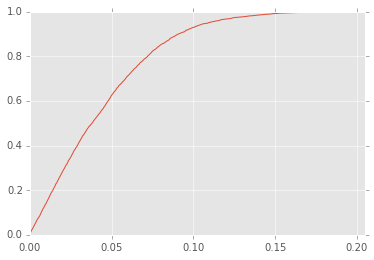

In [446]:
meansseries.value_counts(normalize=True).sort_index().cumsum().plot()

In [447]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [448]:
others.totalwgt_lb.mean()

7.325855614973262

In [449]:
meansseries = get_means(others.totalwgt_lb, firsts.totalwgt_lb)

0.124761184535
0.00025
